In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

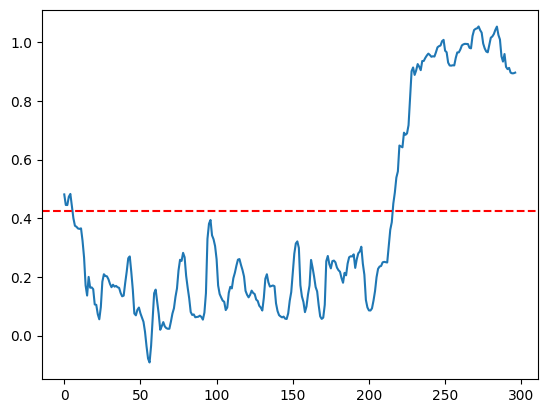

In [87]:
df = pd.read_csv(r"D:\NirwanaWarehouse\uniWork\Term 7\Capstone\backend\FITTR_API\testing_file.csv")
plt.plot(df['LEFT_INDEX'])
plt.axhline(0.425, color='r', linestyle='--')

In [94]:
import numpy as np
import ast
import re
# Function to read the file and process the data
def process_csv_file(df: pd.DataFrame) -> pd.DataFrame:
    # Initialize an empty DataFrame with correct column names
    front_test_df = pd.DataFrame(columns=['x', 'y', 'z'])

    # Process each row
    for index, row in df.iterrows():
        try:
            # Convert string representation of tuple to actual tuple
            x, y, z = ast.literal_eval(row.iloc[0])  # row.iloc[0] extracts the single column value
            entry_df = pd.DataFrame([[x, y, z]], columns=['x', 'y', 'z'])  # Create a DataFrame row

            # Append the new row correctly
            front_test_df = pd.concat([front_test_df, entry_df], ignore_index=True)
        except Exception as e:
            print(f"Error processing row {index}: {e}")

    return front_test_df
    
#coordinates = process_csv_file(r"D:\NirwanaWarehouse\uniWork\Term 7\Capstone\backend\FITTR_API\testing_front_camera.csv")
file_path = r"D:\NirwanaWarehouse\uniWork\Term 7\Capstone\backend\FITTR_API\testing_front_camera.csv"
test_df = pd.read_csv(file_path)

C:\Users\saran\AppData\Local\Temp\ipykernel_26976\1828230290.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  front_test_df = pd.concat([front_test_df, entry_df], ignore_index=True)


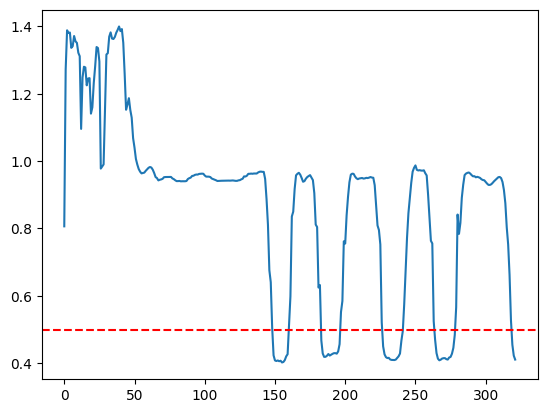

In [95]:
landmark = "RIGHT_INDEX"
coordinates = process_csv_file(pd.DataFrame(test_df[landmark]))
plt.plot(coordinates['y'])
#plt.plot(coordinates['z'])
plt.axhline(0.5, color='r', linestyle='--')
#plt.plot(coordinates['x'])
#plt.legend(['y', 'z', 'x'])
plt.show()

In [ ]:
SQUATTING = False
REP = 0
IMPROPER_REP = 0
TRUE_IMPROPER_REP = 0
THR = 155
IMPROPER_THR = 140

for _, record in df.iterrows():
    IMPROPER_SQUAT = record["LEFT_ANGLE"] > IMPROPER_THR and record["RIGHT_ANGLE"] > IMPROPER_THR
    PROPER_SQUAT = record["LEFT_ANGLE"] > THR and record["RIGHT_ANGLE"] > THR
    if PROPER_SQUAT and not IMPROPER_SQUAT and not SQUATTING:
        SQUATTING = True
        REP += 1
    elif IMPROPER_SQUAT:
        IMPROPER_REP += 1
    elif record["LEFT_ANGLE"] < IMPROPER_THR and record["RIGHT_ANGLE"] < IMPROPER_THR and SQUATTING:
        SQUATTING = False

TRUE_IMPROPER_REP = IMPROPER_REP - REP

print(f"Proper Reps: {REP}")
print(f"Improper Reps: {IMPROPER_REP}")
print(f"True Improper Reps: {TRUE_IMPROPER_REP}")


Proper Reps: 5
Improper Reps: 21
True Improper Reps: 16


In [3]:
def apply_ema_smoothing(df, span=10):
    """
    Applies Exponential Moving Average (EMA) smoothing to 'LEFT_ANGLE' and 'RIGHT_ANGLE' columns.

    Args:
        df (pd.DataFrame): Input DataFrame with 'LEFT_ANGLE' and 'RIGHT_ANGLE' columns.
        span (int): Span of the EMA. Higher values result in smoother curves.

    Returns:
        pd.DataFrame: DataFrame with smoothed 'LEFT_ANGLE_EMA' and 'RIGHT_ANGLE_EMA' columns.
    """

    if 'LEFT_ANGLE' not in df.columns or 'RIGHT_ANGLE' not in df.columns:
        raise ValueError("DataFrame must contain 'LEFT_ANGLE' and 'RIGHT_ANGLE' columns.")

    df['LEFT_ANGLE_EMA'] = df['LEFT_ANGLE'].ewm(span=span).mean()
    df['RIGHT_ANGLE_EMA'] = df['RIGHT_ANGLE'].ewm(span=span).mean()

    return df
def livestream_ema_smoothing(current_record,past_record,alpha=0.2):
    if past_record is None:
        return current_record
    else:
        return past_record + alpha * (current_record - past_record)


In [4]:
high_thr = 0.45
low_thr = 0.4
high_rep = low_rep = 0
for idx,record in df.iterrows():
    current_val = df.at[idx,"RIGHT_INDEX"]
    prev_val = df.at[idx-1,"RIGHT_INDEX"] if idx > 0 else None
    if current_val > high_thr and (prev_val is None or prev_val < high_thr):
        high_rep += 1
    if current_val < low_thr and (prev_val is None or prev_val > low_thr):
        low_rep += 1
print(f"High Reps: {high_rep}")
print(f"Low Reps: {low_rep}")
plt.plot(df['RIGHT_INDEX'], label='Right Angle')
plt.axhline(y=high_thr, color='r', linestyle='--')
plt.axhline(y=low_thr, color='r', linestyle='--')

KeyError: 'RIGHT_INDEX'

In [5]:
import time
import numpy as np

threshold = 155
timestamps = []
frequency = []
above_threshold = False

for index, record in df.iterrows():
    avg_angle = (record["LEFT_ANGLE"] + record["RIGHT_ANGLE"]) / 2
    if avg_angle > threshold and not above_threshold:
        timestamps.append(time.time())  # Append current timestamp
        above_threshold = True
            # Calculate frequency of timestamps per second
        if len(timestamps) > 1:
            time_diffs = np.diff(timestamps)
            freq = 1 / np.mean(time_diffs) if np.mean(time_diffs) != 0 else 0
        else:
            freq = 0
        frequency.append(freq)
    elif avg_angle <= threshold:
        above_threshold = False

    

print(timestamps)
print(frequency)

[1740623983.1912217, 1740623983.1942217, 1740623983.1952233, 1740623983.1982217, 1740623983.2012224, 1740623983.2042248]
[0, 333.3310021457522, 499.79790276453764, 428.5732970027248, 399.971773232251, 384.52336859861754]


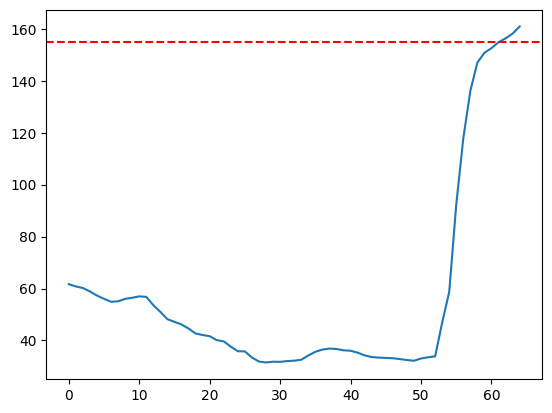

In [5]:
plt.plot((df["LEFT_ANGLE"]+df['RIGHT_ANGLE'])/2)
plt.axhline(y=155, color='r', linestyle='--')
plt.show()

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
def analyze_performance(data):
    df = pd.DataFrame(data)
    df["Successes"] = df["Requests"] - df["Failures"]
    df["Failure %"] = (df["Failures"] / df["Requests"]) * 100

    df = pd.DataFrame(data)

    # Calculate successes and failure percentages
    df["Successes"] = df["Requests"] - df["Failures"]
    df["Failure %"] = (df["Failures"] / df["Requests"]) * 100

    # Plot the barplot
    plt.figure(figsize=(10, 5))

    # Add failures first
    bars_failures = sns.barplot(x="Request Type", y="Failures", data=df, color="#ED2100", label="Failures")

    # Add successes on top of failures
    bars_successes = sns.barplot(
        x="Request Type",
        y="Successes",
        data=df,
        color="#88E788",
        label="Successes",
        bottom=df["Failures"]
    )

    # Annotate the bars with failure percentages
    for i, row in df.iterrows():
        plt.text(i, row["Requests"] + 1, s=f'{row["Failure %"]:.1f}% Fails', color='red', ha="center")

    # Add labels and title
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("Count")
    plt.title("Successes and Failures with Failure Rate")
    plt.legend(loc="upper left")
    plt.show()

    # Plot response times
    plt.figure(figsize=(10, 5))

    # Plot the lines
    sns.lineplot(x="Request Type", y="Avg Response Time (ms)", data=df, marker="o", label="Average")
    sns.lineplot(x="Request Type", y="Min Response Time (ms)", data=df, marker="o", label="Minimum")
    sns.lineplot(x="Request Type", y="Max Response Time (ms)", data=df, marker="o", label="Maximum")

    # Label each data point
    for i, row in df.iterrows():
        plt.text(i, row["Avg Response Time (ms)"] + 200, f'{row["Avg Response Time (ms)"]:.1f}', color="black", fontsize=8, ha="center")
        plt.text(i, row["Min Response Time (ms)"] + 200, f'{row["Min Response Time (ms)"]:.1f}', color="black", fontsize=8, ha="center")
        plt.text(i, row["Max Response Time (ms)"] + 200, f'{row["Max Response Time (ms)"]:.1f}', color="black", fontsize=8, ha="center")

    # Add labels and title
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("Response Time (ms)")
    plt.title("Response Time Statistics")
    plt.legend()
    plt.show()


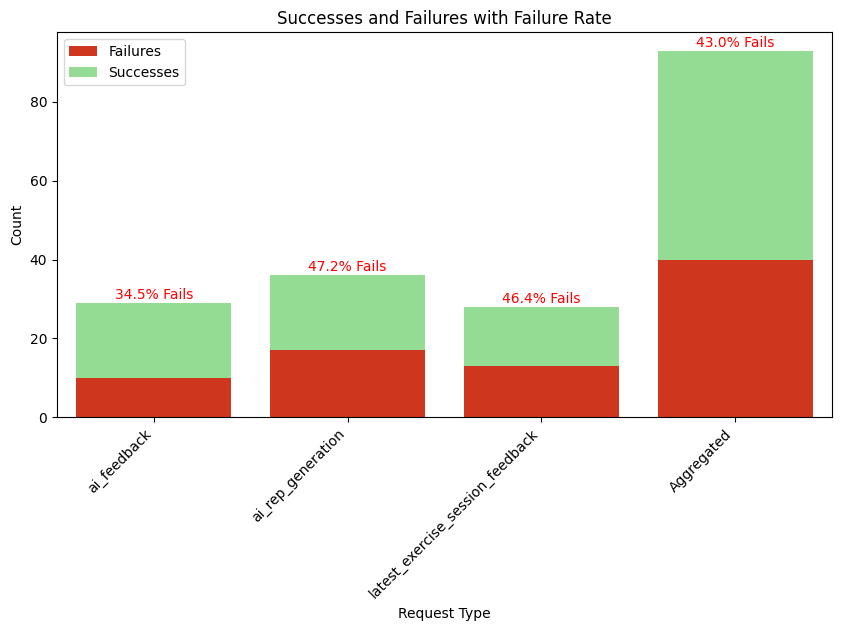

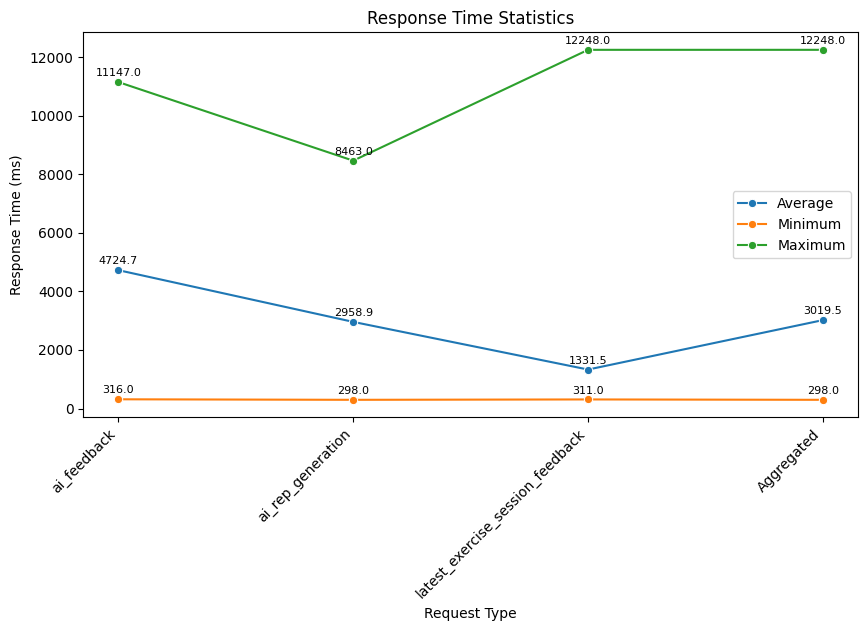

In [6]:
# Creating a structured dataframe from the extracted data
iteration_2_data = {
    "Request Type": ["ai_feedback", "ai_rep_generation", "latest_exercise_session_feedback", "Aggregated"],
    "Requests": [29, 36, 28, 93],
    "Failures": [10, 17, 13, 40],
    "Avg Response Time (ms)": [4724.7, 2958.89, 1331.46, 3019.54],
    "Min Response Time (ms)": [316, 298, 311, 298],
    "Max Response Time (ms)": [11147, 8463, 12248, 12248],
}
analyze_performance(iteration_2_data)




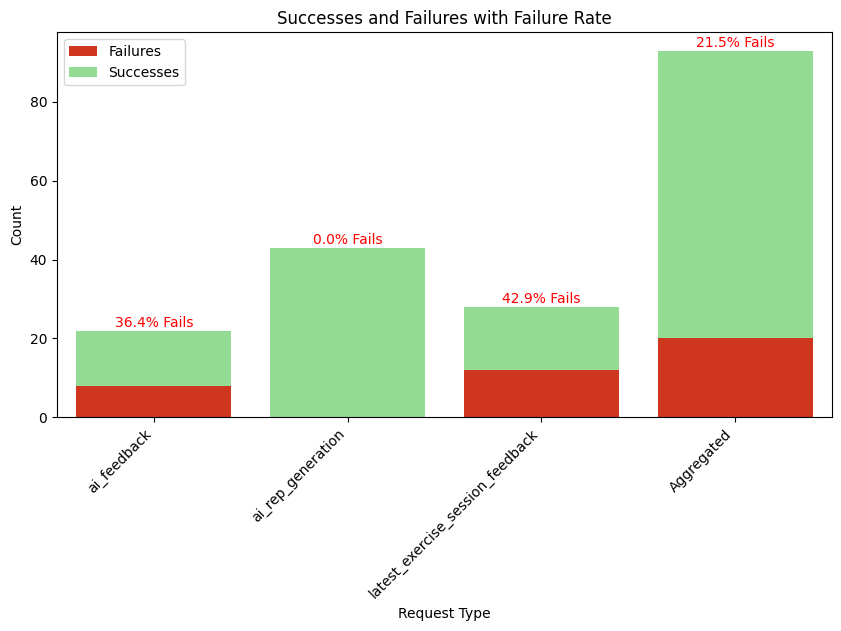

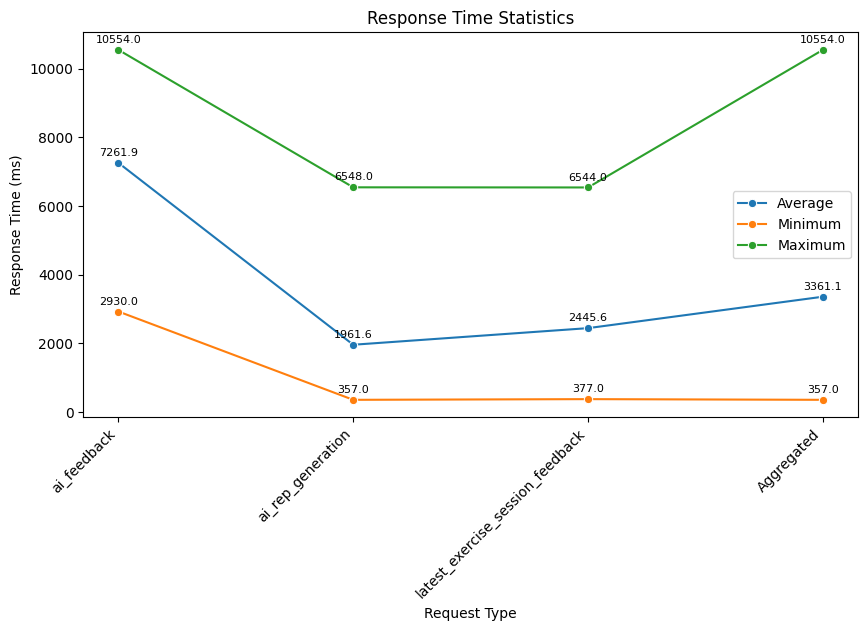

In [7]:
iteration_3_data = {
    "Request Type": ["ai_feedback", "ai_rep_generation", "latest_exercise_session_feedback", "Aggregated"],
    "Requests": [22, 43, 28, 93],
    "Failures": [8, 0, 12, 20],
    "Avg Response Time (ms)": [7261.86, 1961.59, 2445.57, 3361.13],
    "Min Response Time (ms)": [2930, 357, 377, 357],
    "Max Response Time (ms)": [10554, 6548, 6544, 10554],
}
analyze_performance(iteration_3_data)

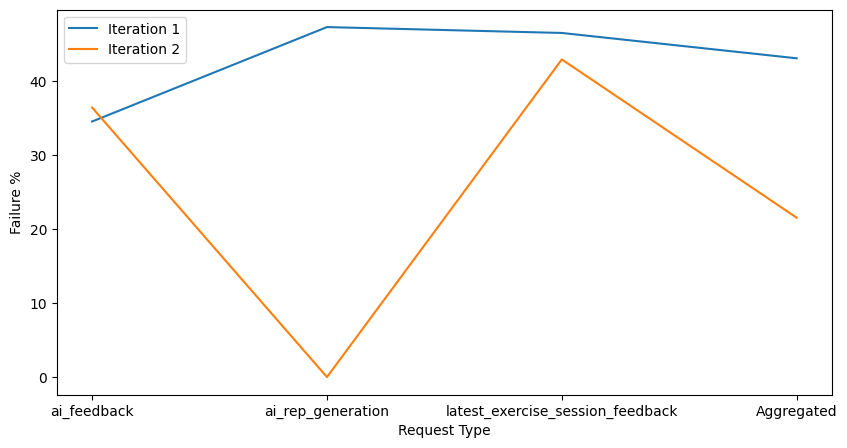

In [11]:
def compare_metrics(d1,d2):
    d1,d2 = pd.DataFrame(d1),pd.DataFrame(d2)
    d1["Successes"] = d1["Requests"] - d1["Failures"]
    d1["Failure %"] = (d1["Failures"] / d1["Requests"]) * 100
    d2["Successes"] = d2["Requests"] - d2["Failures"]
    d2["Failure %"] = (d2["Failures"] / d2["Requests"]) * 100
    plt.figure(figsize=(10, 5))
    sns.lineplot(x="Request Type",y="Failure %",data=d1,label="Iteration 1")
    sns.lineplot(x="Request Type",y="Failure %",data=d2,label="Iteration 2")
    plt.legend()
    plt.show()
compare_metrics(iteration_2_data,iteration_3_data)